In [1]:
import pandas as pd
import numpy as np

In [285]:
import pandoc

In [2]:
job_header_df = pd.read_csv('data/job_listing_header.csv')
job_detail_df = pd.read_csv('data/job_listing_detail.csv')

In [3]:
job_header_df.head(2)

company        date  \
0  Projas Technologies, LLC  2017-04-18   
1   Creative Data Resources  2017-04-05   

                                           detailUrl  \
0  http://www.dice.com/job/result/10126850/DATA-E...   
1  http://www.dice.com/job/result/cdatar/933219?s...   

                                            jobTitle  job_listing_no  \
0  Senior Data Engineer *** 200K or contract to h...               1   
1                           Director of Data Science               2   

            location  page  
0  San Francisco, CA     1  
1       New York, NY     1

In [4]:
job_detail_df.head(2)

job_listing_no                                           job_type  page  \
0               1  Full Time, Contract Corp-To-Corp, Contract Ind...     1   
1               2                                          Full Time     1   

          salary_info                                   technical_skills  \
0  150-200K+RSU+BONUS  R, Python, JavaScript, C, Java,  SQL, Data Sci...   
1            180-220k  5+ years experience as a Data Scientist. 3+ ye...   

                                        travel_info  
0  Telecommuting not available\nTravel not required  
1  Telecommuting not available\nTravel not required

### Preping job header data

In [5]:
#splitting city, state 
job_header_df.loc[:,'City'] = job_header_df.loc[:,'location'].str.split(',').str[0]
job_header_df.loc[:,'State'] = job_header_df.loc[:,'location'].str.split(',').str[1]

In [6]:
job_header_df.head(2)

company        date  \
0  Projas Technologies, LLC  2017-04-18   
1   Creative Data Resources  2017-04-05   

                                           detailUrl  \
0  http://www.dice.com/job/result/10126850/DATA-E...   
1  http://www.dice.com/job/result/cdatar/933219?s...   

                                            jobTitle  job_listing_no  \
0  Senior Data Engineer *** 200K or contract to h...               1   
1                           Director of Data Science               2   

            location  page           City State  
0  San Francisco, CA     1  San Francisco    CA  
1       New York, NY     1       New York    NY

In [7]:
df = job_header_df.groupby(['location'])['detailUrl'].count()

In [8]:
df.sort_values(ascending=False).head()

location
New York, NY         1160
San Francisco, CA     844
Chicago, IL           692
Atlanta, GA           640
Washington, DC        568
Name: detailUrl, dtype: int64

### Preping job detail data


In [10]:
job_detail_df['travel_info'].unique()

array(['Telecommuting not available\nTravel not required',
       'Telecommuting available\nTravel not required',
       'Telecommuting not available\nTravel required to 100%.',
       'Telecommuting not available\nTravel required to 10%.',
       'Telecommuting not available\nTravel required to 70%.',
       'Telecommuting not available\nTravel required to 25%.',
       'Telecommuting not available\nTravel required to 15%.',
       'Telecommuting not available\nTravel required to 75%.', nan,
       'Telecommuting not available\nTravel required to 40%.',
       'Telecommuting not available\nTravel required to 50%.',
       'Telecommuting available\nTravel required to 25%.',
       'Telecommuting not available\nTravel required to 20%.',
       'Telecommuting not available\nTravel required to 5%.',
       'Telecommuting available\nTravel required to 10%.',
       'Telecommuting not available\nTravel required to 30%.',
       'Telecommuting available\nTravel required to 50%.',
       'Tel

In [11]:
'ajay' in 'ajayant'

True

In [9]:
def travel_info_parser(s):
    if 'Telecommuting not available\nTravel not required' in s:
        return 'Office'
    elif 'Telecommuting available\nTravel not required' in s:
        return 'WFH'
    elif 'Telecommuting not available\nTravel required to 100%' in s:
        return 'Office with 100% travel'
    elif 'Telecommuting not available' in s:
        return 'Office with some travel'
    elif 'Telecommuting available\nTravel required to 100%' in s:
        return 'WFH with 100% travel'
    elif 'Telecommuting available' in s:
        return 'WFH with some travel'
    else:
        return ''

In [10]:
job_detail_df.loc[:,'job_travel_info']=job_detail_df['travel_info'].apply(lambda x: travel_info_parser(str(x)))

In [11]:
job_detail_df.head(2)

job_listing_no                                           job_type  page  \
0               1  Full Time, Contract Corp-To-Corp, Contract Ind...     1   
1               2                                          Full Time     1   

          salary_info                                   technical_skills  \
0  150-200K+RSU+BONUS  R, Python, JavaScript, C, Java,  SQL, Data Sci...   
1            180-220k  5+ years experience as a Data Scientist. 3+ ye...   

                                        travel_info job_travel_info  
0  Telecommuting not available\nTravel not required          Office  
1  Telecommuting not available\nTravel not required          Office

In [12]:
job_detail_df.job_travel_info.unique()

array(['Office', 'WFH', 'Office with 100% travel',
       'Office with some travel', '', 'WFH with some travel',
       'WFH with 100% travel'], dtype=object)

In [13]:
def job_type_parser(s):
    if 'full time' in str.lower(str(s)):
        return 'Full Time' 
    else:
        return 'Contract'

In [14]:
job_detail_df.loc[:,'job_type_info']=job_detail_df['job_type'].apply(lambda x : job_type_parser(x))

In [15]:
job_detail_df.head(2)

job_listing_no                                           job_type  page  \
0               1  Full Time, Contract Corp-To-Corp, Contract Ind...     1   
1               2                                          Full Time     1   

          salary_info                                   technical_skills  \
0  150-200K+RSU+BONUS  R, Python, JavaScript, C, Java,  SQL, Data Sci...   
1            180-220k  5+ years experience as a Data Scientist. 3+ ye...   

                                        travel_info job_travel_info  \
0  Telecommuting not available\nTravel not required          Office   
1  Telecommuting not available\nTravel not required          Office   

  job_type_info  
0     Full Time  
1     Full Time

In [16]:
job_detail_df.shape

(30100, 8)

In [17]:
t_list=[]
for row in job_detail_df.loc[:,['job_listing_no','technical_skills']].iterrows():
    try:
        if row[1][1] != row[1][1]:
            t_list.append((row[0],''))
        else:
            for skl in [str.lower(skl.strip()) for skl in row[1][1].split(',')]:
                t_list.append((row[0],skl))
    except:
        print('failed ' + str(row[0]))
        print(row)
        break


In [18]:
t_list

[(0, 'r'),
 (0, 'python'),
 (0, 'javascript'),
 (0, 'c'),
 (0, 'java'),
 (0, 'sql'),
 (0, 'data scientist'),
 (0, 'machine learning'),
 (0, 'data engineer'),
 (0, 'hadoop'),
 (0, 'hive'),
 (0, 'snowflake'),
 (0, 'pig'),
 (0, 'scala'),
 (1,
  '5+ years experience as a data scientist. 3+ years experience managing engineering teams that solve complex problems. demonstrated experience performing and applying research in a company setting.'),
 (2, 'data scientist or data analyst'),
 (2, 'seo'),
 (2, 'r coding/ sql/python'),
 (3, 'algorithms'),
 (3, 'analysis'),
 (3, 'analyst'),
 (3, 'business intelligence'),
 (3, 'consulting'),
 (3, 'data analysis'),
 (3, 'database'),
 (3, 'data mining'),
 (3, 'data modeling'),
 (3, 'excel'),
 (3, 'genetic'),
 (3, 'modeling'),
 (3, 'networks'),
 (3, 'powerpoint'),
 (3, 'research'),
 (3, 'sas'),
 (3, 'sales'),
 (3, 'sql'),
 (3, 'statistical analysis'),
 (4, 'algorithms'),
 (4, 'database'),
 (4, 'development'),
 (4, 'modeling'),
 (4, 'python'),
 (4, 'research

In [19]:
skill_df = pd.DataFrame(t_list,columns=['job_listing_no','technical_skill'])

In [21]:
skill_df.shape

(232710, 2)

In [22]:
skill_df.tail(2)

job_listing_no technical_skill
232708           30099             wan
232709           30099        wireless

In [23]:
skill_df.to_csv('data/skills_by_job.csv',index=False)

In [24]:
#number of unique skills
len(skill_df['technical_skill'].unique())

23117

In [25]:
skill_df['technical_skill'].unique()

array(['r', 'python', 'javascript', ..., 'zeplin',
       'software and test management systems', 'website testing'], dtype=object)

In [26]:
import string

def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s


In [27]:
remove_punctuation('ajay."antony')

'ajayantony'

In [28]:
skill_df["technical_skill_cln"] = skill_df["technical_skill"].apply(remove_punctuation)

In [30]:
def count_str(s):
    count = len(s.split(" "))
    #mark skills more than 2 words
    if count > 2:
        return None
    else:
        return s
        
    

In [31]:
count_str("ajay antony kliyara")

In [32]:
skill_df["technical_skill_cln"] = skill_df["technical_skill_cln"].apply(count_str)

In [33]:
skill_df.head()

job_listing_no technical_skill technical_skill_cln
0               0               r                   r
1               0          python              python
2               0      javascript          javascript
3               0               c                   c
4               0            java                java

In [34]:
[skill for skill in skill_df["technical_skill_cln"].unique()]

['r',
 'python',
 'javascript',
 'c',
 'java',
 'sql',
 'data scientist',
 'machine learning',
 'data engineer',
 'hadoop',
 'hive',
 'snowflake',
 'pig',
 'scala',
 None,
 'seo',
 'algorithms',
 'analysis',
 'analyst',
 'business intelligence',
 'consulting',
 'data analysis',
 'database',
 'data mining',
 'data modeling',
 'excel',
 'genetic',
 'modeling',
 'networks',
 'powerpoint',
 'research',
 'sas',
 'sales',
 'statistical analysis',
 'development',
 'scientific',
 'statistics',
 'nosql',
 'big data',
 'foundation',
 'manager',
 'project',
 'developer',
 'hardware',
 'lifecycle',
 'ms office',
 'process reengineering',
 'reengineering',
 'ups',
 'agile',
 'management',
 'product engineering',
 'validation',
 'ansi',
 'business analyst',
 'mathematical',
 'programming',
 'supervision',
 'testing',
 'data science',
 'artificial intelligence',
 'neural networks',
 'http',
 'perl',
 'security',
 'mathematical models',
 'physics',
 'data',
 'analytics',
 'mining',
 'etc',
 'cassandra

In [35]:
%matplotlib inline
skill_df.groupby(['technical_skill_cln'])['job_listing_no'].count().sort_values(ascending=False)

technical_skill_cln
development                 5541
management                  5400
sql                         4360
analysis                    3721
security                    3680
project                     3336
java                        3224
testing                     2982
architecture                2192
javascript                  2160
agile                       2157
database                    2149
linux                       2056
hardware                    1973
python                      1943
analyst                     1912
c                           1846
http                        1812
manager                     1739
programming                 1628
developer                   1618
                            1523
oracle                      1521
windows                     1504
project management          1439
excel                       1361
research                    1318
sql server                  1257
networks                    1245
networking             

In [36]:
skillGby = skill_df.groupby(['technical_skill_cln'])['job_listing_no']

In [37]:
len(skillGby.count())

11777

In [38]:
s = skillGby.count()

In [39]:
len(s[s>50])

445

In [40]:
[i for i in s[s>50].sort_values(ascending=False).index]

['development',
 'management',
 'sql',
 'analysis',
 'security',
 'project',
 'java',
 'testing',
 'architecture',
 'javascript',
 'agile',
 'database',
 'linux',
 'hardware',
 'python',
 'analyst',
 'c',
 'http',
 'manager',
 'programming',
 'developer',
 '',
 'oracle',
 'windows',
 'project management',
 'excel',
 'research',
 'sql server',
 'networks',
 'networking',
 'html',
 'unix',
 'consulting',
 'hadoop',
 'cisco',
 'net',
 'modeling',
 'business requirements',
 'mysql',
 'simulation',
 'video',
 'data analysis',
 'xml',
 'vmware',
 'css',
 'protocols',
 'metrics',
 'sales',
 'lifecycle',
 'sdlc',
 'customer service',
 'automated',
 'data warehouse',
 'supervision',
 'business intelligence',
 'software engineer',
 'aws',
 'genetic',
 'scripts',
 'qa',
 'tcpip',
 'etl',
 'powerpoint',
 'aspnet',
 'jquery',
 'scrum',
 'data modeling',
 'business analyst',
 'quality assurance',
 'project manager',
 'analytical skills',
 'nosql',
 'api',
 'exchange',
 'j2ee',
 'validation',
 'wan',

In [48]:
skill_gt_50_list = [i for i in s[s>50].sort_values(ascending=False).index]

In [49]:
skill_df.shape

(165546, 2)

In [43]:
#skill_df["technical_skill_cln"] = skill_df["technical_skill_cln"].apply(count_str)

In [50]:
skill_df = skill_df.loc[skill_df['technical_skill_cln'].isin(skill_gt_50_list)]

In [52]:
skill_df = skill_df.loc[:,['job_listing_no','technical_skill_cln']]

skill_df.head()

job_listing_no technical_skill_cln
0               0                   r
1               0              python
2               0          javascript
3               0                   c
4               0                java

In [53]:
skill_df.loc[:,'count'] = 1

In [54]:
skill_df.head(2)

job_listing_no technical_skill_cln  count
0               0                   r      1
1               0              python      1

In [55]:
tmp = skill_df['technical_skill_cln'].unique()

In [56]:
len(tmp)

445

In [57]:
tmp.sort()

In [58]:
skill_dict = {'technical_skill_cln':
 {'algorithm':'algorithms',
  'analysis':'analytical skills',
  'analyst':'analytical skills',
  'analytical':'analytical skills',
  'analytics':'analytical skills',
  'angular':'angular js',
  'angularjs':'angular js',
  'asp':'aspnet',
  'automation':'automated',
  'bi tools':'business intelligence',
  'bi':'business intelligence',
  'business analyst':'business analysis',
  'circuit':'circuits',
  'cloud':'cloud computing',
  'computer':'computer science',
  'configuration':'configuration management',
  'core java':'java',
  'java developer':'java',
  'j2ee':'java',
  'javaj2ee':'java',
  'css3':'css',
  'data':'analytical skills',
  'data analysis':'analytical skills',
  'data analyst':'analytical skills', 
  'data analytics':'analytical skills',
  'architecture':'data architect',
  'architect' : 'data architect',
  'data architecture' : 'data architect',
  'data science': 'data scientist',
  'data warehouse':'data warehousing',
  'database administration':'dba',
  'development' : 'developer',
  'embedded' : 'embedded systems',
  'embedded software':'embedded systems',
  'engineering' : 'engineer',
  'engineers':'engineer',
  'etc':'',
  'financial':'finance',
  'firewalls':'firewall',
  'genetic':'genetics',
  'hdfs' : 'hadoop',
  'html5' : 'html',
  'manager' : 'management',
  'networks' : 'network',
  'peripheral' : 'peripherals',
  'postgresql' : 'postgres',
  'programmer' : 'programming',
  'protocol' : 'protocols',
  'react' : 'reactjs',
  'restful' : 'rest',
  'routers' : 'router',
  'salesforcecom' : 'salesforce',
  'sfdc' : 'salesforce',
  'scripts' : 'scripting',
  'shell' : 'shell scripting',
  'shell scripts' : 'shell scripting',
  'software' : 'software engineer',
  'software development' : 'software engineer',
  'sql queries' : 'sql',
  'supervision' : 'supervisor',
  'systems' : 'systems engineer',
  'technical writing' : 'technical writer',
  'telecommunications' : 'telecom',
  'test' : 'testing',
  'test plan': 'testing', 
  'tester': 'testing', 
  'vba' : 'vb',
  'vbnet':'vb',
  'web' : 'web developer',
  'windows 7' : 'windows'
  
  }
}

In [59]:
tmp

array(['', '3d', 'access', 'accounting', 'active directory', 'adobe',
       'aerospace', 'agile', 'aix', 'ajax', 'alcatel', 'algorithm',
       'algorithms', 'aml', 'analysis', 'analyst', 'analytical',
       'analytical skills', 'analytics', 'android', 'angular',
       'angular js', 'angularjs', 'ansi', 'ansible', 'antivirus', 'apache',
       'apex', 'api', 'application', 'application servers', 'applications',
       'architect', 'architecture', 'asp', 'aspnet', 'assembly', 'autocad',
       'automated', 'automation', 'aws', 'azure', 'b2b', 'banking', 'bash',
       'bgp', 'bi', 'bi tools', 'big data', 'bind', 'biometrics',
       'bootstrap', 'bridges', 'broadband', 'browser', 'business analysis',
       'business analyst', 'business intelligence', 'business objects',
       'business requirements', 'bw', 'c', 'cabling', 'cad', 'call center',
       'capacity planning', 'case', 'cassandra', 'cc', 'ccie', 'ccna',
       'ccnp', 'cgi', 'change management', 'chef', 'cio', 'circuit',


In [60]:
skill_df_bk = skill_df.copy()

In [61]:
#eliminating 
skill_df.replace(skill_dict,inplace=True)

In [62]:
len(skill_df['technical_skill_cln'].unique())

375

In [63]:
temp_df = pd.pivot_table(skill_df,index='job_listing_no',columns='technical_skill_cln',values='count')

In [64]:
del temp_df['']

In [65]:
temp_df = temp_df.reset_index()

In [66]:
temp_df.shape

(22042, 375)

In [67]:
job_detail_df.shape

(30100, 8)

In [68]:
temp_df.columns

Index(['job_listing_no', '3d', 'access', 'accounting', 'active directory',
       'adobe', 'aerospace', 'agile', 'aix', 'ajax',
       ...
       'web developer', 'web services', 'weblogic', 'websphere', 'windows',
       'windows server', 'wireless', 'writer', 'xml', 'xslt'],
      dtype='object', name='technical_skill_cln', length=375)

In [69]:
job_detail_df_comb = pd.merge(job_detail_df,temp_df,how='left',left_on='job_listing_no',right_on='job_listing_no')

In [70]:
job_detail_df_comb.head()

job_listing_no                                           job_type  page  \
0               1  Full Time, Contract Corp-To-Corp, Contract Ind...     1   
1               2                                          Full Time     1   
2               3  Contract Corp-To-Corp, Contract Independent, C...     1   
3               4                               Full Time, Full-time     1   
4               5                                          Full Time     1   

             salary_info                                   technical_skills  \
0     150-200K+RSU+BONUS  R, Python, JavaScript, C, Java,  SQL, Data Sci...   
1               180-220k  5+ years experience as a Data Scientist. 3+ ye...   
2  Depends On Experience  Data Scientist or data analyst , seo, R coding...   
3            Competitive  Algorithms, Analysis, Analyst, Business Intell...   
4                    NaN  Algorithms, Database, Development, Modeling, P...   

                                        travel_info job_travel_info  \
0  Telecommuting not available\nTravel not required          Office   
1  Telecommuting not available\nTravel not required          Office   
2  Telecommuting not available\nTravel not required          Office   
3  Telecommuting not available\nTravel not required          Office   
4  Telecommuting not available\nTravel not required          Office   

  job_type_info  3d  access  ...   web developer  web services  weblogic  \
0     Full Time NaN     NaN  ...             NaN           NaN       NaN   
1     Full Time NaN     NaN  ...             NaN           NaN       NaN   
2      Contract NaN     NaN  ...             NaN           NaN       NaN   
3     Full Time NaN     NaN  ...             NaN           NaN       NaN   
4     Full Time NaN     NaN  ...             NaN           NaN       NaN   

   websphere  windows  windows server  wireless  writer  xml  xslt  
0        NaN      NaN             NaN       NaN     NaN  NaN   NaN  
1        NaN      NaN             NaN       NaN     NaN  NaN   NaN  
2        NaN      NaN             NaN       NaN     NaN  NaN   NaN  
3        NaN      NaN             NaN       NaN     NaN  NaN   NaN  
4        NaN      NaN             NaN       NaN     NaN  NaN   NaN  

[5 rows x 382 columns]

In [71]:
job_detail_df_comb = job_detail_df_comb.fillna(0)

In [72]:
job_detail_df_comb.head()

job_listing_no                                           job_type  page  \
0               1  Full Time, Contract Corp-To-Corp, Contract Ind...     1   
1               2                                          Full Time     1   
2               3  Contract Corp-To-Corp, Contract Independent, C...     1   
3               4                               Full Time, Full-time     1   
4               5                                          Full Time     1   

             salary_info                                   technical_skills  \
0     150-200K+RSU+BONUS  R, Python, JavaScript, C, Java,  SQL, Data Sci...   
1               180-220k  5+ years experience as a Data Scientist. 3+ ye...   
2  Depends On Experience  Data Scientist or data analyst , seo, R coding...   
3            Competitive  Algorithms, Analysis, Analyst, Business Intell...   
4                      0  Algorithms, Database, Development, Modeling, P...   

                                        travel_info job_travel_info  \
0  Telecommuting not available\nTravel not required          Office   
1  Telecommuting not available\nTravel not required          Office   
2  Telecommuting not available\nTravel not required          Office   
3  Telecommuting not available\nTravel not required          Office   
4  Telecommuting not available\nTravel not required          Office   

  job_type_info   3d  access  ...   web developer  web services  weblogic  \
0     Full Time  0.0     0.0  ...             0.0           0.0       0.0   
1     Full Time  0.0     0.0  ...             0.0           0.0       0.0   
2      Contract  0.0     0.0  ...             0.0           0.0       0.0   
3     Full Time  0.0     0.0  ...             0.0           0.0       0.0   
4     Full Time  0.0     0.0  ...             0.0           0.0       0.0   

   websphere  windows  windows server  wireless  writer  xml  xslt  
0        0.0      0.0             0.0       0.0     0.0  0.0   0.0  
1        0.0      0.0             0.0       0.0     0.0  0.0   0.0  
2        0.0      0.0             0.0       0.0     0.0  0.0   0.0  
3        0.0      0.0             0.0       0.0     0.0  0.0   0.0  
4        0.0      0.0             0.0       0.0     0.0  0.0   0.0  

[5 rows x 382 columns]

In [73]:
job_detail_df_comb.iloc[3,:]

job_listing_no                                                       4
job_type                                          Full Time, Full-time
page                                                                 1
salary_info                                                Competitive
technical_skills     Algorithms, Analysis, Analyst, Business Intell...
travel_info           Telecommuting not available\nTravel not required
job_travel_info                                                 Office
job_type_info                                                Full Time
3d                                                                   0
access                                                               0
accounting                                                           0
active directory                                                     0
adobe                                                                0
aerospace                                                            0
agile 

In [74]:
job_detail_df_comb.to_csv('data/job_detail_comb_raw.csv',index=False)

In [75]:
job_detail_df_comb.columns

Index(['job_listing_no', 'job_type', 'page', 'salary_info', 'technical_skills',
       'travel_info', 'job_travel_info', 'job_type_info', '3d', 'access',
       ...
       'web developer', 'web services', 'weblogic', 'websphere', 'windows',
       'windows server', 'wireless', 'writer', 'xml', 'xslt'],
      dtype='object', length=382)

In [76]:
job_detail_df_comb.shape

(30100, 382)

In [77]:
job_header_df.shape

(30100, 9)

In [79]:
job_detail_cluster_df = job_detail_df_comb.copy()

In [80]:
job_detail_cluster_df = job_detail_cluster_df.drop(['job_listing_no', 'job_type', 'page', 'salary_info', 'technical_skills','travel_info', 'job_travel_info','job_type_info'],axis=1)

In [81]:
job_detail_cluster_df.head()

3d  access  accounting  active directory  adobe  aerospace  agile  aix  \
0  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
1  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
2  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
3  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
4  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   

   ajax  alcatel  ...   web developer  web services  weblogic  websphere  \
0   0.0      0.0  ...             0.0           0.0       0.0        0.0   
1   0.0      0.0  ...             0.0           0.0       0.0        0.0   
2   0.0      0.0  ...             0.0           0.0       0.0        0.0   
3   0.0      0.0  ...             0.0           0.0       0.0        0.0   
4   0.0      0.0  ...             0.0           0.0       0.0        0.0   

   windows  windows server  wireless  writer  xml  xslt  
0      0.0             0.0       0.0     0.0  0.0   0.0  
1      0.0             0.0       0.0     0.0  0.0   0.0  
2      0.0             0.0       0.0     0.0  0.0   0.0  
3      0.0             0.0       0.0     0.0  0.0   0.0  
4      0.0             0.0       0.0     0.0  0.0   0.0  

[5 rows x 374 columns]

In [84]:
#https://www.packtpub.com/books/content/clustering-k-means
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

K = range(1, 30)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(job_detail_cluster_df)
    meandistortions.append(sum(np.min(cdist(job_detail_cluster_df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / job_detail_cluster_df.shape[0])


In [85]:
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [133]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(job_detail_cluster_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
job_detail_cluster_df['cluster'] = kmeans.labels_

In [135]:
job_detail_cluster_df['job_listing_no']=job_detail_df_comb['job_listing_no']

In [136]:
job_detail_cluster_df.head()

3d  access  accounting  active directory  adobe  aerospace  agile  aix  \
0  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
1  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
2  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
3  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   
4  0.0     0.0         0.0               0.0    0.0        0.0    0.0  0.0   

   ajax  alcatel       ...        weblogic  websphere  windows  \
0   0.0      0.0       ...             0.0        0.0      0.0   
1   0.0      0.0       ...             0.0        0.0      0.0   
2   0.0      0.0       ...             0.0        0.0      0.0   
3   0.0      0.0       ...             0.0        0.0      0.0   
4   0.0      0.0       ...             0.0        0.0      0.0   

   windows server  wireless  writer  xml  xslt  cluster  job_listing_no  
0             0.0       0.0     0.0  0.0   0.0        0               1  
1             0.0       0.0     0.0  0.0   0.0        0               2  
2             0.0       0.0     0.0  0.0   0.0        2               3  
3             0.0       0.0     0.0  0.0   0.0        4               4  
4             0.0       0.0     0.0  0.0   0.0        0               5  

[5 rows x 376 columns]

In [137]:
job_detail_cluster_df.to_csv('data/clustered_job.csv',index=False)

In [138]:
job_detail_cluster_df=job_detail_cluster_df.drop('job_listing_no',axis=1)

In [139]:
job_detail_cluster_df.groupby('cluster')['cluster'].count()

cluster
0    19553
1     1226
2     2851
3     1934
4     1453
5     3083
Name: cluster, dtype: int64

In [140]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [271]:
job_detail_cluster_df.columns

Index(['3d', 'access', 'accounting', 'active directory', 'adobe', 'aerospace',
       'agile', 'aix', 'ajax', 'alcatel',
       ...
       'web services', 'weblogic', 'websphere', 'windows', 'windows server',
       'wireless', 'writer', 'xml', 'xslt', 'cluster'],
      dtype='object', length=375)

In [141]:
pca_df = job_detail_cluster_df.copy();

In [142]:
pca_df=pca_df.drop('cluster',axis=1)

In [143]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(pca_df))


In [144]:
transformed.head()

0         1
0 -0.502763 -0.097960
1 -0.502763 -0.097960
2  0.808102  0.173707
3  0.344094  0.339268
4 -0.455611  0.076819

In [145]:
pca_vis_df = pd.concat([transformed,job_detail_cluster_df['cluster']],axis=1)

In [146]:
pca_vis_df.columns = ['x','y','cluster']

In [147]:
pca_vis_df.head()

x         y  cluster
0 -0.502763 -0.097960        0
1 -0.502763 -0.097960        0
2  0.808102  0.173707        2
3  0.344094  0.339268        4
4 -0.455611  0.076819        0

In [148]:
import seaborn as sns

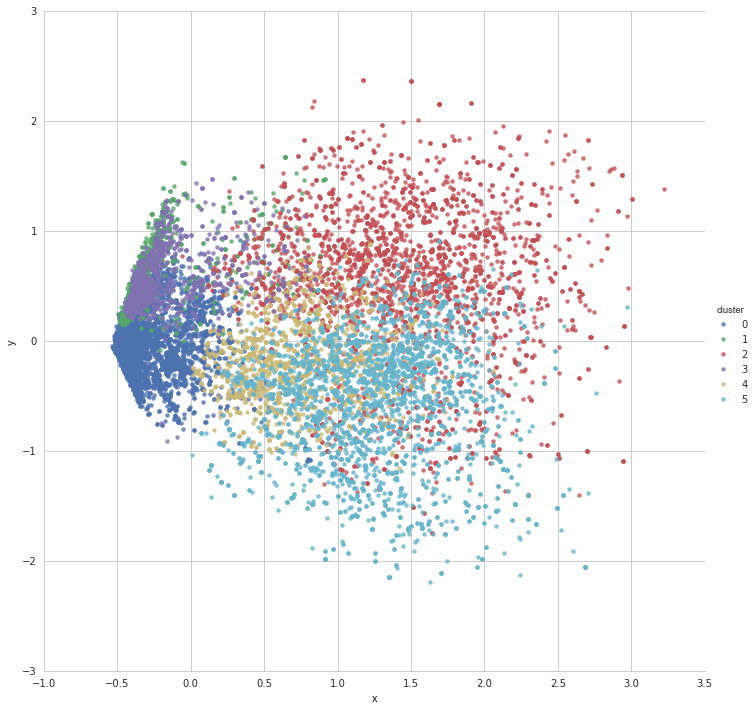

In [149]:
sns.lmplot('x', 'y', data=pca_vis_df, hue='cluster', fit_reg=False, size=10)

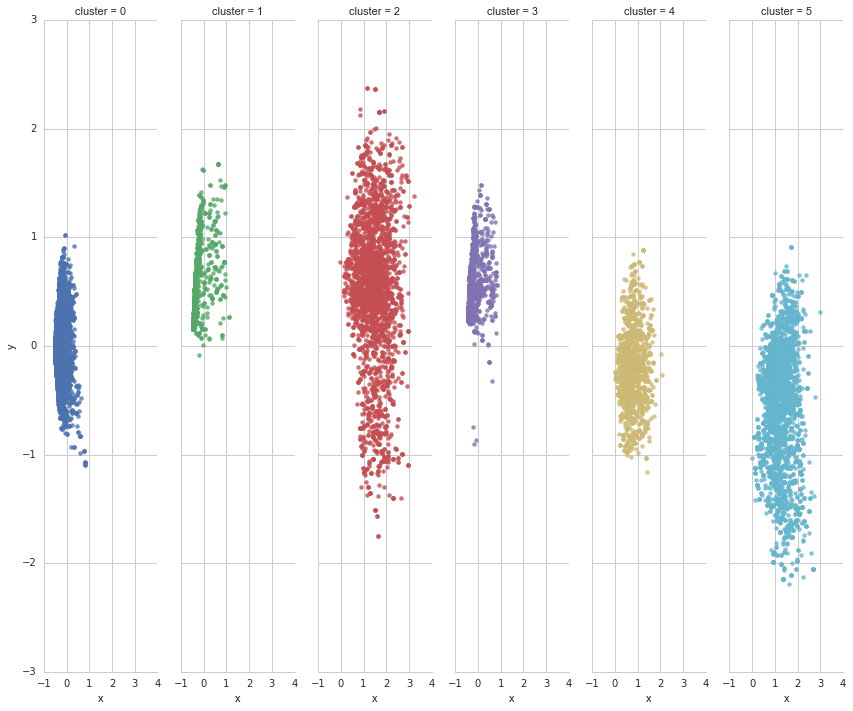

In [150]:
sns.set_style("whitegrid")
sns.lmplot('x', 'y', data=pca_vis_df, hue='cluster', col='cluster', fit_reg=False, size=10, aspect=.2)

In [151]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed =  pd.DataFrame(lda.fit_transform(pca_df,job_detail_cluster_df['cluster']))

In [152]:
lda_transformed.head()

0         1
0 -1.811530  0.661668
1 -1.811530  0.661668
2  2.954020 -0.343657
3  1.369423  0.069220
4 -1.865512  0.441628

In [153]:
lda_vis_df = pd.concat([lda_transformed,job_detail_cluster_df['cluster']],axis=1)

In [154]:
lda_vis_df.columns = ['x','y','cluster']

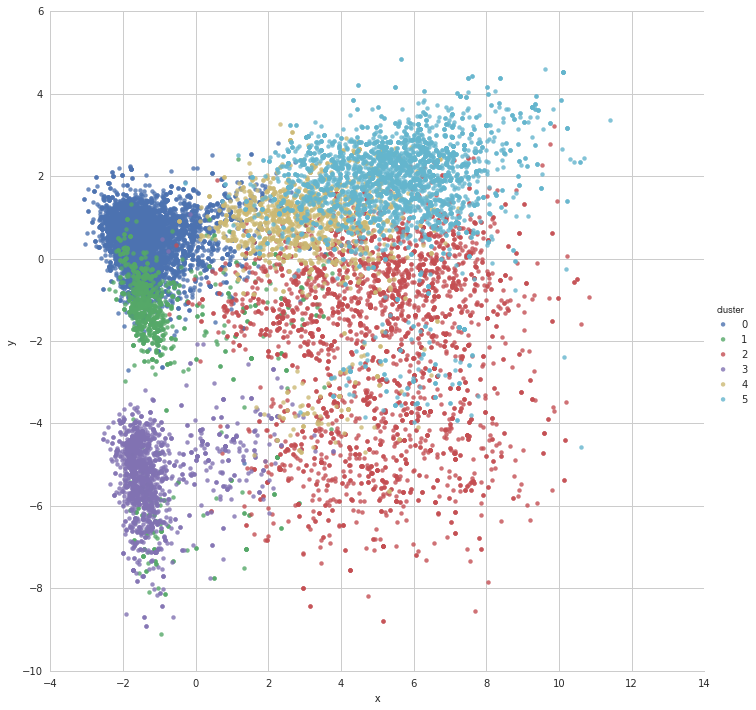

In [155]:
sns.lmplot('x', 'y', data=lda_vis_df, hue='cluster', fit_reg=False, size=10)

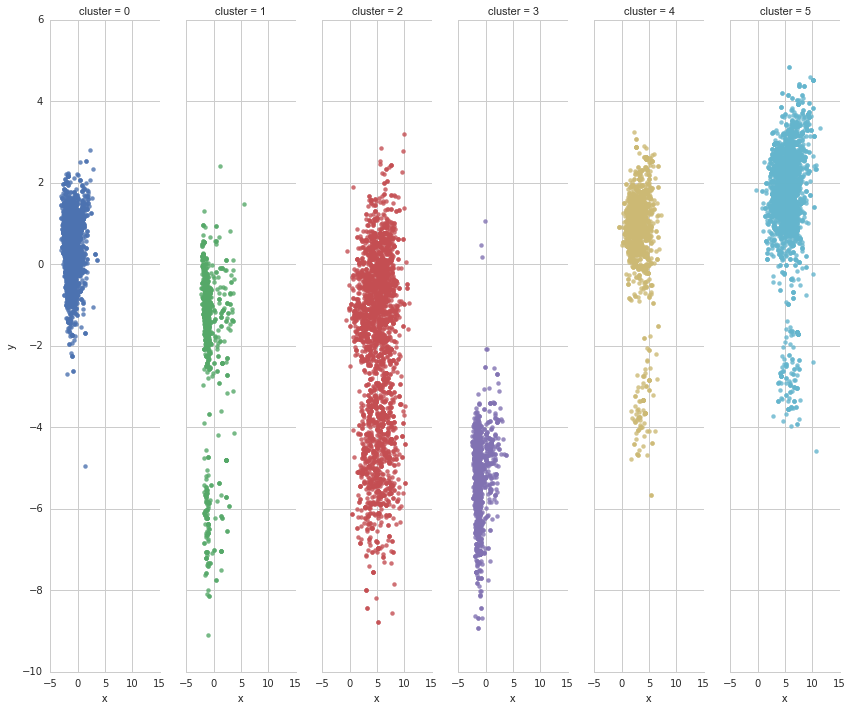

In [156]:
sns.lmplot('x', 'y', data=lda_vis_df, hue='cluster', col='cluster', fit_reg=False, size=10, aspect=.2)

In [155]:
t_df = job_detail_cluster_df.loc[job_detail_cluster_df.cluster==3,:]

In [156]:
l = t_df.sum()[t_df.sum()>0]

In [157]:
len(l.index)

322

In [158]:
l.sort_values(ascending=False)

cluster                  5760.0
sql                      1917.0
analytical skills         352.0
c                         225.0
etl                       220.0
javascript                177.0
python                    167.0
developer                 157.0
oracle                    156.0
sql server                151.0
net                       150.0
business intelligence     137.0
ssrs                      127.0
ssis                      121.0
agile                     119.0
html                      118.0
database                  117.0
data warehousing          111.0
aspnet                    104.0
excel                     103.0
tableau                   101.0
xml                        94.0
hadoop                     86.0
sas                        84.0
business analysis          81.0
data modeling              73.0
windows                    71.0
unix                       68.0
linux                      67.0
management                 65.0
                          ...  
technici

In [74]:
#row[1][1]
t_list=[]
for skl in [str.lower(skl.strip()) for skl in row[1][1].split(',')]:
    print(t_list.append((1,skl)))

None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [77]:
pd.DataFrame(t_list,columns=['job_listing_no','technical_skill'])

job_listing_no   technical_skill
0                1                 r
1                1            python
2                1        javascript
3                1                 c
4                1              java
5                1               sql
6                1    data scientist
7                1  machine learning
8                1     data engineer
9                1            hadoop
10               1              hive
11               1         snowflake
12               1               pig
13               1             scala

In [158]:
job_detail_df.columns

Index(['job_listing_no', 'job_type', 'page', 'salary_info', 'technical_skills',
       'travel_info', 'job_travel_info', 'job_type_info'],
      dtype='object')

In [157]:
job_detail_df.groupby(['salary_info'])['job_listing_no'].count().sort_values(ascending=False)

salary_info
Depends On Experience                 6416
Negotiable                            3369
Competitive                           1760
Market                                1315
Unspecified                            526
open                                   496
market                                 333
-                                      303
BASED ON EXPERIENCE                    216
Based on Experience                    162
competitive                            110
0.00                                    70
0                                       64
00                                      62
$                                       62
$100,000 - $150,000                     42
Annual                                  41
$100,000 - $130,000                     40
$100,000 - $120,000                     38
MARKET                                  38
$120,000 - $160,000                     36
$100,000 - $160,000                     35
60                                      33

In [199]:
salary_df.shape

(3901, 9)

In [169]:
salary_df = job_detail_df.loc[['-' in str(i) for i in list(job_detail_df.salary_info.values)],:]

In [200]:
salary_list = [re.sub('[^0-9-]+', '', salary) for salary in salary_df.salary_info]

In [205]:
salary_list= [str(sal).split('-')[1] for sal in salary_list]

In [ ]:
for sal in salary_list:
    if sal == '':
        

In [209]:
def sal_check(sal):
    if sal == '':
        return 0
    else:
        return int(sal)


In [212]:
salary_list=[sal_check(sal) for sal in salary_list]

In [213]:
salary_df.loc[:,'salary_c']=salary_list


/Users/ajaykliyara/anaconda_py3/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [214]:
salary_df.head()

job_listing_no                                           job_type  page  \
0                1  Full Time, Contract Corp-To-Corp, Contract Ind...     1   
1                2                                          Full Time     1   
20              21                                          Full Time     1   
27              28                                          Full Time     1   
36              37                                                NaN     1   

                          salary_info  \
0                  150-200K+RSU+BONUS   
1                            180-220k   
20  $150000.00 - $180000.00 per annum   
27                                  -   
36              130000.00 - 130000.00   

                                     technical_skills  \
0   R, Python, JavaScript, C, Java,  SQL, Data Sci...   
1   5+ years experience as a Data Scientist. 3+ ye...   
20  Manager, Data Scientist, Hadoop, Cassandra, Sp...   
27  Required Qualifications ? * Bachelor degree in...   
36                              (See Job Description)   

                                         travel_info job_travel_info  \
0   Telecommuting not available\nTravel not required          Office   
1   Telecommuting not available\nTravel not required          Office   
20  Telecommuting not available\nTravel not required          Office   
27  Telecommuting not available\nTravel not required          Office   
36  Telecommuting not available\nTravel not required          Office   

   job_type_info  salary_c  
0      Full Time       200  
1      Full Time       220  
20     Full Time  18000000  
27     Full Time         0  
36      Contract  13000000

In [215]:
for i in salary_df.salary_c.unique():
    print(i)

200
220
18000000
0
13000000
1700
230
652
4000
130000
170
150000
120000
225000
250000
400000
175000
150
180000
165000
151000
160000
200000
95000
140000
160
50
11000
90000
135
500000
145000
140
53
12000
70
90
2500
350000
120
100
14000000
110
80000
325000
80
7500
180
802
300
130
110000
4500
65
60
75
35
20
10400000
170000
100000
5700
135000
115
55
105000
51
4300000
2
18
2000
75000
11000000
3125
5923
82700
76
40
70450
22
165
3600
125
124244
115000
88000
2450
48
95
97
9521102
85000
85
190000
8500
15000000
185000
62
28
11500
4256
105
10500000
60000
190
5188
176
145
7000
900
70000
388160
5989
82
99320
121617
84508
148948
17
139000
7367
6000
33
38
3943
500
12500000
3000
30
5500
63712
352
15000
8300000
6300
5000
55000
9000000
125000
116590
14500000
7600
65002
15
4400
13
6500
752
250
1500
45
32
5160
8002
6700
4988
26
4135
10000000
155
66904
65000
13550
12000000
79000
402
149572
5300
545
42000
2628
2285
665
41065
216825
91200
11500000
99120
6200
1092
7084150
5656
1300
72
86
120200
91000
7050
2300


In [228]:
salary_df=salary_df.loc[(salary_df['salary_c']>50000)&(salary_df['salary_c']<500000),:]

In [229]:
salary_df.shape

(1926, 9)

In [232]:
salary_df.columns

Index(['job_listing_no', 'job_type', 'page', 'salary_info', 'technical_skills',
       'travel_info', 'job_travel_info', 'job_type_info', 'salary_c'],
      dtype='object')

In [234]:
int_df = pd.concat([job_header_df,job_detail_cluster_df],axis=1)

In [235]:
int_df.shape

(30100, 384)

In [233]:
job_detail_cluster_df.columns

Index(['3d', 'access', 'accounting', 'active directory', 'adobe', 'aerospace',
       'agile', 'aix', 'ajax', 'alcatel',
       ...
       'web services', 'weblogic', 'websphere', 'windows', 'windows server',
       'wireless', 'writer', 'xml', 'xslt', 'cluster'],
      dtype='object', length=375)

In [238]:
salary_df.join?

In [240]:
salary_df= salary_df.join(int_df,on='job_listing_no',how='inner',lsuffix='sal_')


In [241]:
salary_df.shape

(1926, 393)

In [255]:
salary_df=salary_df.astype(str)

In [257]:
salary_df.head()

job_listing_nosal_                        job_type pagesal_  \
72                  73                       Full Time        2   
105                106  Full Time, Full-time, Employee        3   
109                110                       Full Time        3   
116                117  Full Time, Full-time, Employee        3   
118                119                       Full Time        3   

             salary_info                                   technical_skills  \
72       100,000-130,000                              SQL, ETL, BI,  Python   
105  $100,000 - $150,000  Machine Learning, Data Mining, Python, Hadoop,...   
109      105000 - 120000                     Data Science, machine learning   
116  $160,000 - $225,000  Data Scientist, Machine Learning, Personalizat...   
118  $150,000 - $250,000                               Data Science, Python   

                                          travel_info job_travel_info  \
72   Telecommuting not available\nTravel not required          Office   
105  Telecommuting not available\nTravel not required          Office   
109  Telecommuting not available\nTravel not required          Office   
116  Telecommuting not available\nTravel not required          Office   
118  Telecommuting not available\nTravel not required          Office   

    job_type_info salary_c       company   ...   web services weblogic  \
72      Full Time   130000  AboutWeb LLC   ...            0.0      0.0   
105     Full Time   150000   CyberCoders   ...            0.0      0.0   
109     Full Time   120000     Itron Inc   ...            0.0      0.0   
116     Full Time   225000      CompNova   ...            0.0      0.0   
118     Full Time   250000   CyberCoders   ...            0.0      0.0   

    websphere windows windows server wireless writer  xml xslt cluster  
72        0.0     0.0            0.0      0.0    0.0  0.0  0.0       0  
105       0.0     0.0            0.0      0.0    0.0  0.0  0.0       0  
109       0.0     0.0            0.0      0.0    0.0  0.0  0.0       0  
116       0.0     0.0            0.0      0.0    0.0  0.0  0.0       0  
118       0.0     0.0            0.0      0.0    0.0  0.0  0.0       0  

[5 rows x 393 columns]

In [259]:
import csv

In [263]:
salary_df.columns

Index(['job_listing_nosal_', 'job_type', 'pagesal_', 'salary_info',
       'technical_skills', 'travel_info', 'job_travel_info', 'job_type_info',
       'salary_c', 'company',
       ...
       'web services', 'weblogic', 'websphere', 'windows', 'windows server',
       'wireless', 'writer', 'xml', 'xslt', 'cluster'],
      dtype='object', length=393)

In [267]:
salary_reg = salary_df.drop(['job_listing_nosal_', 'job_type', 'pagesal_', 'salary_info',
       'technical_skills', 'travel_info','date','detailUrl','jobTitle','job_listing_no','page','location','State'],axis=1)

In [268]:
salary_reg.to_csv('data/salary.csv',index=False,quoting=csv.QUOTE_ALL)

In [249]:
salary_df.columns

Index(['job_listing_nosal_', 'job_type', 'pagesal_', 'salary_info',
       'technical_skills', 'travel_info', 'job_travel_info', 'job_type_info',
       'salary_c', 'company',
       ...
       'web services', 'weblogic', 'websphere', 'windows', 'windows server',
       'wireless', 'writer', 'xml', 'xslt', 'cluster'],
      dtype='object', length=393)

In [252]:
sal_only = salary_df.loc[:,['job_listing_no','salary_c']]

In [253]:
sal_only.to_csv('data/salary_only.csv',index=False)

In [247]:
pd.read_csv('data/salary.csv',sep='\t')

job_listing_nosal_                        job_type  pagesal_  \
0                     73                       Full Time         2   
1                    106  Full Time, Full-time, Employee         3   
2                    110                       Full Time         3   
3                    117  Full Time, Full-time, Employee         3   
4                    119                       Full Time         3   
5                    120  Full Time, Full-time, Employee         3   
6                    130  Full Time, Full-time, Employee         3   
7                    134                       Full Time         3   
8                    137  Full Time, Full-time, Employee         3   
9                    138             Full Time, salaried         3   
10                   139                 Full Time, Perm         3   
11                   152                       Full Time         4   
12                   153  Full Time, Full-time, Employee         4   
13                   155            Full Time, Permanent         4   
14                   160  Full Time, Full-time, Employee         4   
15                   166  Full Time, Full-time, Employee         4   
16                   167  Full Time, Full-time, Employee         4   
17                   172  Full Time, Full-time, Employee         4   
18                   174  Full Time, Full-time, Employee         4   
19                   176  Full Time, Full-time, Employee         4   
20                   180  Full Time, Full-time, Employee         4   
21                   183  Full Time, Full-time, Employee         4   
22                   185  Full Time, Full-time, Employee         4   
23                   187  Full Time, Full-time, Employee         4   
24                   194  Full Time, Full-time, Employee         4   
25                   200  Full Time, Full-time, Employee         4   
26                   205  Full Time, Full-time, Employee         5   
27                   207  Full Time, Full-time, Employee         5   
28                   210  Full Time, Full-time, Employee         5   
29                   211  Full Time, Full-time, Employee         5   
...                  ...                             ...       ...   
1896               29669                       Full Time       594   
1897               29680  Full Time, Full-time, Employee       594   
1898               29723  Full Time, Full-time, Employee       595   
1899               29735  Full Time, Full-time, Employee       595   
1900               29755  Full Time, Full-time, Employee       596   
1901               29765  Full Time, Full-time, Employee       596   
1902               29769  Full Time, Full-time, Employee       596   
1903               29777                       Full Time       596   
1904               29806  Full Time, Full-time, Employee       597   
1905               29810  Full Time, Full-time, Employee       597   
1906               29811  Full Time, Full-time, Employee       597   
1907               29843                       Full Time       597   
1908               29866  Full Time, Full-time, Employee       598   
1909               29867  Full Time, Full-time, Employee       598   
1910               29869  Full Time, Full-time, Employee       598   
1911               29884                       Full Time       598   
1912               29902  Full Time, Full-time, Employee       599   
1913               29908  Full Time, Full-time, Employee       599   
1914               29914  Full Time, Full-time, Employee       599   
1915               29924  Full Time, Full-time, Employee       599   
1916               29928  Full Time, Full-time, Employee       599   
1917               29939                       Full Time       599   
1918               29952  Full Time, Full-time, Employee       600   
1919               29979  Full Time, Full-time, Employee       600   
1920               30010  Full Time, Full-time, Employee       601   
1921            

In [245]:
salary_df.to_csv?

In [244]:
salary_df.head()

job_listing_nosal_                        job_type  pagesal_  \
72                   73                       Full Time         2   
105                 106  Full Time, Full-time, Employee         3   
109                 110                       Full Time         3   
116                 117  Full Time, Full-time, Employee         3   
118                 119                       Full Time         3   

             salary_info                                   technical_skills  \
72       100,000-130,000                              SQL, ETL, BI,  Python   
105  $100,000 - $150,000  Machine Learning, Data Mining, Python, Hadoop,...   
109      105000 - 120000                     Data Science, machine learning   
116  $160,000 - $225,000  Data Scientist, Machine Learning, Personalizat...   
118  $150,000 - $250,000                               Data Science, Python   

                                          travel_info job_travel_info  \
72   Telecommuting not available\nTravel not required          Office   
105  Telecommuting not available\nTravel not required          Office   
109  Telecommuting not available\nTravel not required          Office   
116  Telecommuting not available\nTravel not required          Office   
118  Telecommuting not available\nTravel not required          Office   

    job_type_info  salary_c       company   ...    web services weblogic  \
72      Full Time    130000  AboutWeb LLC   ...             0.0      0.0   
105     Full Time    150000   CyberCoders   ...             0.0      0.0   
109     Full Time    120000     Itron Inc   ...             0.0      0.0   
116     Full Time    225000      CompNova   ...             0.0      0.0   
118     Full Time    250000   CyberCoders   ...             0.0      0.0   

    websphere  windows windows server  wireless writer  xml  xslt  cluster  
72        0.0      0.0            0.0       0.0    0.0  0.0   0.0        0  
105       0.0      0.0            0.0       0.0    0.0  0.0   0.0        0  
109       0.0      0.0            0.0       0.0    0.0  0.0   0.0        0  
116       0.0      0.0            0.0       0.0    0.0  0.0   0.0        0  
118       0.0      0.0            0.0       0.0    0.0  0.0   0.0        0  

[5 rows x 393 columns]

In [230]:
salary_df.columns

Index(['job_listing_no', 'job_type', 'page', 'salary_info', 'technical_skills',
       'travel_info', 'job_travel_info', 'job_type_info', 'salary_c'],
      dtype='object')

In [172]:
len(salary_df.salary_info.unique())

1423

###  Nearest Neighbors

In [269]:
from sklearn.neighbors import NearestNeighbors

In [270]:
neigh = NearestNeighbors(5, 0.5)

In [272]:
nn_job_skill_df = job_detail_cluster_df.copy()

In [274]:
nn_job_skill_df=nn_job_skill_df.drop('cluster',axis=1)

In [275]:
neigh.fit(nn_job_skill_df)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=0.5)

In [279]:
test_job = nn_job_skill_df.iloc[10,:]

In [280]:
neigh.kneighbors(test_job,5,return_distance=True)

/Users/ajaykliyara/anaconda_py3/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(array([[ 0.        ,  1.        ,  1.        ,  3.31662479,  3.31662479]]),
 array([[  10,   15,    9, 2477,  191]]))